In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\sharm\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
df=pd.read_csv("Ice_cream selling data.csv")



In [6]:
df.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [23]:
x=df.iloc[:,:-1]

In [24]:
y=df["Ice Cream Sales (units)"]

In [25]:
x

,Temperature (°C)
0,-4.662263
1,-4.316559
2,-4.213985
3,-3.949661
4,-3.578554
5,-3.455712
6,-3.108440
7,-3.081303
8,-2.672461
9,-2.652287


In [26]:
y

0     41.842986
1     34.661120
2     39.383001
3     37.539845
4     32.284531
5     30.001138
6     22.635401
7     25.365022
8     19.226970
9     20.279679
10    13.275828
11    18.123991
12    11.218294
13    10.012868
14    12.615181
15    10.957731
16     6.689123
17     9.392969
18     5.210163
19     4.673643
20     0.328626
21     0.897603
22     3.165600
23     1.931416
24     2.576782
25     4.625689
26     0.789974
27     2.313806
28     1.292361
29     0.953115
30     3.782570
31     4.857988
32     8.943823
33     8.170735
34     7.412094
35    10.336631
36    15.996620
37    12.568237
38    21.342916
39    20.114413
40    22.839406
41    16.983279
42    25.142082
43    26.104740
44    28.912188
45    17.843957
46    34.530743
47    27.698383
48    41.514822
Name: Ice Cream Sales (units), dtype: float64

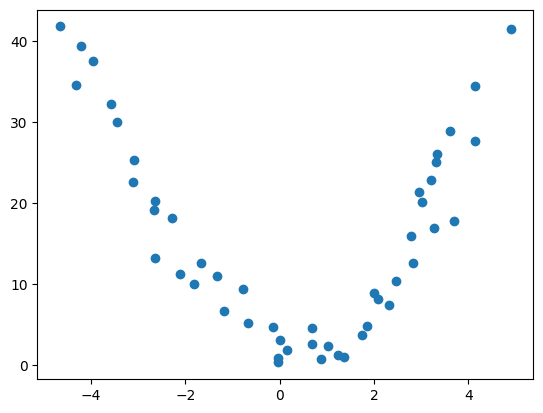

In [27]:
plt.scatter(x,y)
plt.show()

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42) 

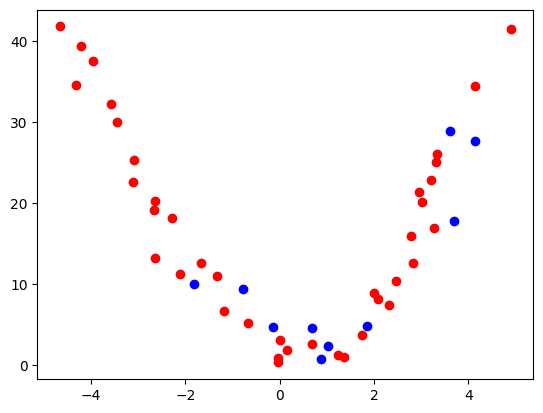

In [30]:
plt.scatter(x_train,y_train,color="red",label="training data")
plt.scatter(x_test,y_test,color="blue",label="testing data")
plt.show()

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
model=LinearRegression()

In [33]:
model.fit(x_train,y_train)

LinearRegression()

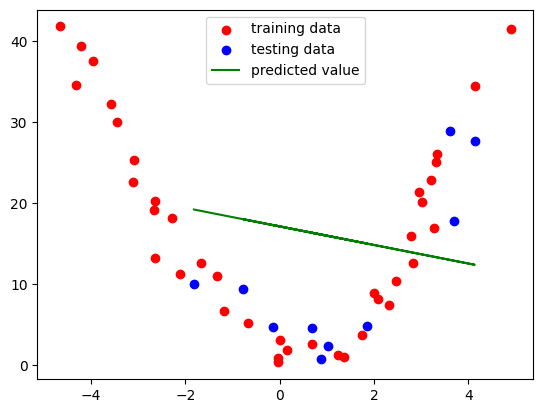

In [46]:
plt.scatter(x_train,y_train,color="red",label="training data")
plt.scatter(x_test,y_test,color="blue",label="testing data")
plt.plot(x_test,model.predict(x_test),color="green",label="predicted value")
plt.legend(loc=9)
plt.show()

In [47]:
from sklearn.metrics import r2_score

In [48]:
r2_score(y_test,model.predict(x_test))

-0.5751270190188227

# use polynomial feature

In [50]:
from sklearn.preprocessing import PolynomialFeatures

In [51]:
poly=PolynomialFeatures(degree=2)

In [52]:
x_train_new=poly.fit_transform(x_train)

In [53]:
x_test_new=poly.fit_transform(x_test)

In [55]:
x_test_new

array([[ 1.        , -1.81893761,  3.30853403],
       [ 1.        ,  3.70405744, 13.72004151],
       [ 1.        ,  4.13353379, 17.08610158],
       [ 1.        ,  3.61077848, 13.03772121],
       [ 1.        , -0.77333004,  0.59803936],
       [ 1.        ,  1.02418081,  1.04894634],
       [ 1.        ,  0.87490503,  0.76545881],
       [ 1.        ,  0.69359887,  0.4810794 ],
       [ 1.        ,  1.85055193,  3.42454243],
       [ 1.        , -0.14963487,  0.02239059]])

In [56]:
from sklearn.linear_model import LinearRegression

In [58]:
my_model=LinearRegression()

In [60]:
my_model.fit(x_train_new,y_train)

LinearRegression()

In [61]:
my_model.predict(poly.fit_transform([[-4.662263]]))

array([46.74098561])

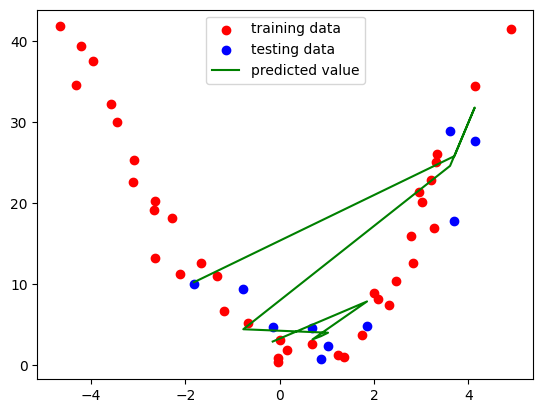

In [62]:
plt.scatter(x_train,y_train,color="red",label="training data")
plt.scatter(x_test,y_test,color="blue",label="testing data")
plt.plot(x_test,my_model.predict(poly.fit_transform(x_test)),color="green",label="predicted value")
plt.legend(loc=9)
plt.show()

In [64]:
r2_score(y_test,my_model.predict(poly.fit_transform(x_test)))

0.843055137193884

In [65]:
import joblib

In [67]:
joblib.dump(my_model,"icecream sell precidtor.joblib")

['icecream sell precidtor.joblib']